In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("sonar.all-data", header=None)

# Separate features and labels
X = df.iloc[:, :-1]  # first 60 columns
y = df.iloc[:, -1]   # last column (label: 'R' or 'M')

# Check basic info
print("Shape:", df.shape)
print("First rows:\n", df.head())
print("Label distribution:\n", y.value_counts())


Shape: (208, 61)
First rows:
        0       1       2       3       4       5       6       7       8   \
0  0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109   
1  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
2  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
3  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
4  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   

       9   ...      51      52      53      54      55      56      57  \
0  0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084   
1  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
2  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
3  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
4  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   

       58      59  60  
0  0.0090  0.0032   R  
1  0.0052  0.0

### **PreProcessing**

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Split features and labels
X = df.iloc[:, :-1]
y = LabelEncoder().fit_transform(df.iloc[:, -1])  # M=1, R=0

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Feature scaling (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training and evaluation

In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.81      1.00      0.90        22
           1       1.00      0.75      0.86        20

    accuracy                           0.88        42
   macro avg       0.91      0.88      0.88        42
weighted avg       0.90      0.88      0.88        42

[[22  0]
 [ 5 15]]


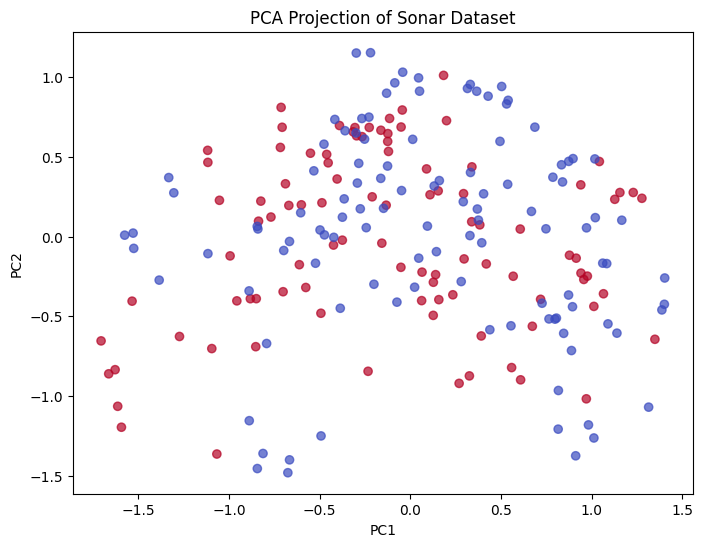

In [4]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', alpha=0.7)
plt.title("PCA Projection of Sonar Dataset")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


### **training the model using XGboost**

c:\Python310\lib\site-packages\xgboost\training.py:183: UserWarning: [09:45:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\saeem\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


🔍 Accuracy: 0.9286

📋 Classification Report:
              precision    recall  f1-score   support

           M       0.88      1.00      0.94        22
           R       1.00      0.85      0.92        20

    accuracy                           0.93        42
   macro avg       0.94      0.93      0.93        42
weighted avg       0.94      0.93      0.93        42



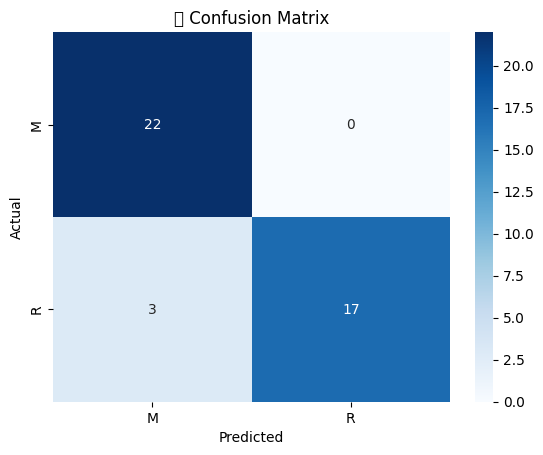

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Load the dataset
df = pd.read_csv("sonar.all-data", header=None)

# 2. Split features and target
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Encode the labels ('M' -> 1, 'R' -> 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42
)

# 5. Feature scaling (optional but improves performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Train XGBoost Classifier
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
xgb_model.fit(X_train_scaled, y_train)

# 7. Predict and evaluate
y_pred = xgb_model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🔍 Accuracy: {accuracy:.4f}\n")

# Classification Report
print("📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("🧱 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Moving with XGboost since the accuracy of XGboost is 93% and RandomForest is 88%

In [7]:
import joblib

# Save the trained model
joblib.dump(xgb_model, "xgboost_sonar_model.pkl")

# Save the scaler as well (important if you want to use the model later)
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully.")


✅ Model and scaler saved successfully.


# Running a test Script

In [9]:
import joblib
import numpy as np

# Load model and scaler
model = joblib.load("xgboost_sonar_model.pkl")
scaler = joblib.load("scaler.pkl")

# Sample input (60 features)
sample = np.array([
    0.0200, 0.0371, 0.0428, 0.0207, 0.0954, 0.0986, 0.1539, 0.1601, 0.3109, 0.2111,
    0.1609, 0.1582, 0.2238, 0.0645, 0.0660, 0.2273, 0.3100, 0.2999, 0.5078, 0.4797,
    0.5783, 0.5071, 0.4328, 0.5550, 0.6711, 0.6415, 0.7104, 0.8080, 0.6791, 0.3857,
    0.1307, 0.2604, 0.5121, 0.7547, 0.8537, 0.8507, 0.6692, 0.6097, 0.4943, 0.2744,
    0.0510, 0.2832, 0.2824, 0.4256, 0.2642, 0.1386, 0.1051, 0.1343, 0.0383, 0.0324,
    0.0232, 0.0166, 0.0095, 0.0180, 0.0244, 0.0316, 0.0164, 0.0095, 0.0078, 0.0095
]).reshape(1, -1)

# Scale and predict
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

# Decode label
label = 'M' if prediction[0] == 1 else 'R'
print("🧠 Predicted label:", label)


🧠 Predicted label: M
